In [13]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from venn import venn, pseudovenn

ROOT_PATH = '/home/karina/ehr_ood_detection/'
sys.path.append(ROOT_PATH)

from src.utils.scoreshandler import NoveltyScoresHandler

TABLES_DIR = os.path.join(ROOT_PATH, "data/novelty_tables")
DATA_ORIGIN = "VUmc"
RESULT_DIR = os.path.join(ROOT_PATH, "data/results")

In [14]:
nsh = NoveltyScoresHandler(data_origin = "VUmc",
                          result_dir = RESULT_DIR)

When loading test novelty scores, could not set patients ID. Continuing without IDs.
When loading train novelty scores, could not set patients ID. Continuing without IDs.


In [15]:
IDs = nsh.get_top_outliers(N=50, multiindex=True)
IDs.head()

NNEnsemble                                   NN             \
              (entropy) (mutual information) (std) (entropy) (max prob)   
Top Outliers                                                              
0                     2                    2     2         2          2   
1                    14                   14    14        18         18   
2                    49                   18    18       146        146   
3                   146                   26    59       172        172   
4                   223                   59   146       223        223   

                         AE       PPCA             LOF AnchoredNNEnsemble  \
             (reconstr err) (log prob) (outlier score)          (entropy)   
Top Outliers                                                                
0                        37         37              14                  2   
1                        92         59              19                 14   
2                       103         92              48                 18   
3                       121        103              54                 19   
4                       192        121              59                 39   

                                        MCDropout                             \
             (mutual information) (std) (entropy) (mutual information) (std)   
Top Outliers                                                                   
0                               1     1        44                    7    44   
1                               2     2        49                   31    49   
2                              11    12        67                   58    59   
3                              12    13       146                   61   146   
4                              13    14       172                   71   148   

                             VAE                               \
             (latent prior prob) (latent prob) (reconstr err)   
Top Outliers                                                    
0                             14            12             12   
1                             26            22             13   
2                             37            43             14   
3                             50            59             37   
4                             74            66             59   

                                    LogReg             
             (reconstr err grad) (entropy) (max prob)  
Top Outliers                                           
0                             20        56         56  
1                             23        63         63  
2                             28        71         71  
3                             58        97         97  
4                             63       134        134

In [16]:
# Plot intersection of Patient IDs with different metrics for each model
fig = plt.figure(figsize =(20,12))

i = 0 
for col in IDs.columns.levels[0]:
    sets = dict()
    
    if 1 < len(IDs[col].columns) < 7:
        
        for subcol in IDs[col].columns:
            sets[col + ' ' + subcol] = set(IDs[col][subcol])
            
        ax = fig.add_subplot(2,3, i+1)   
        venn(sets, ax = ax, fontsize=8)
        
        i += 1

In [75]:
# Find patient IDs for each model (either in AT LEAST ONE metric or in ALL metrics) and plot pseudovenn diagram

def get_id_sets(df, 
                column_list,
                type = "union"):
    sets = dict()
    
    for col in column_list:
        setlist = [set(df[col][i]) for i in df[col].columns]
        if type == "union":
            ids = set.union(*setlist)
        else:
            ids = set.intersection(*setlist)
        
        sets[col] = ids
        
    return sets

    
def plot_venn(df, 
              column_list,
              pseudo=True,
              title=None):
    
    sets = get_id_sets(df, column_list)
    if pseudo:
        pseudovenn(sets, fontsize = 8)
    else:
        venn(sets, fontsize = 8)
    
    if title is None:
        title = "Intersection of outlier from all models"
        
    plt.title(title)
    plt.show()

In [20]:
# Get all possible sets of size 6 from the available models

from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

res = list(powerset(IDs.columns.levels[0]))
res = [r for r in res if len(r) == 6]

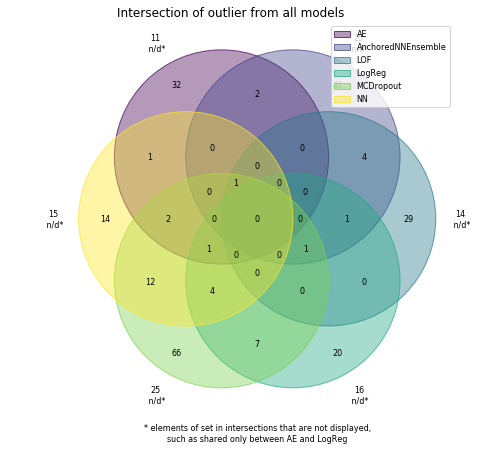

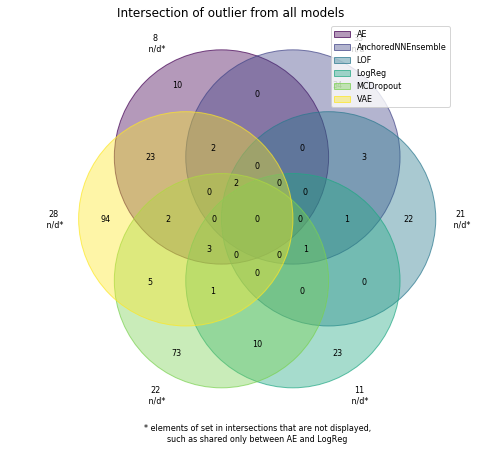

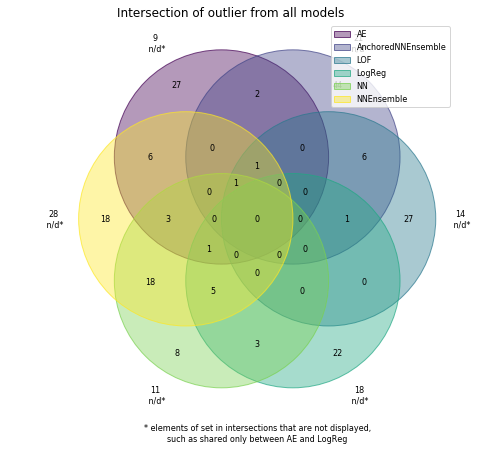

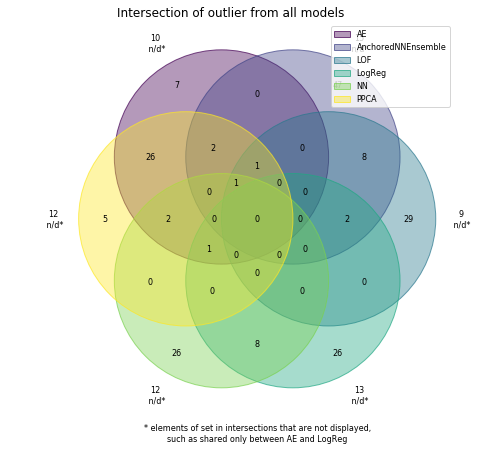

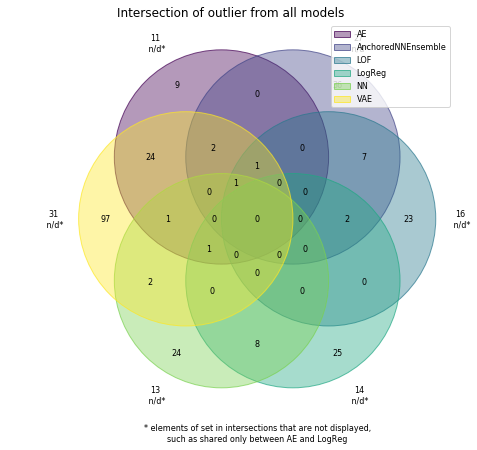

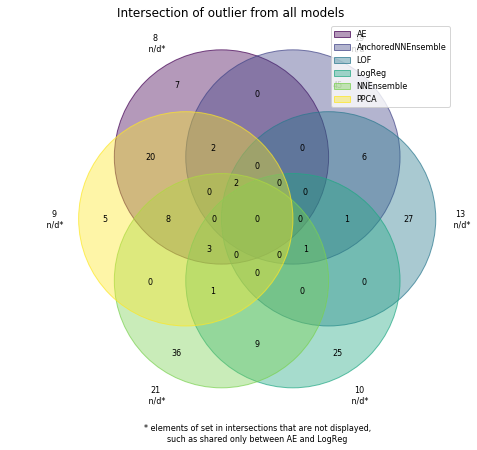

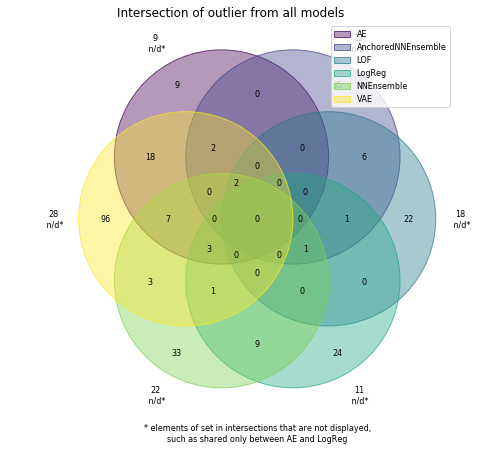

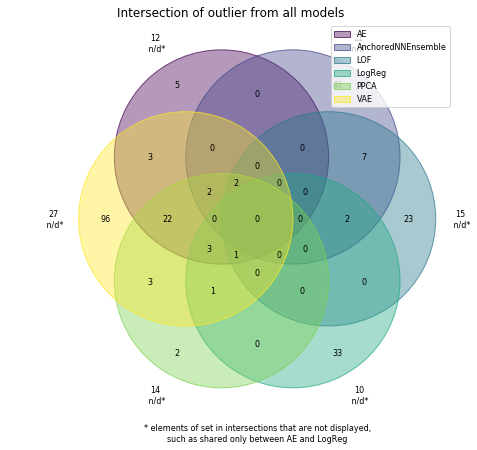

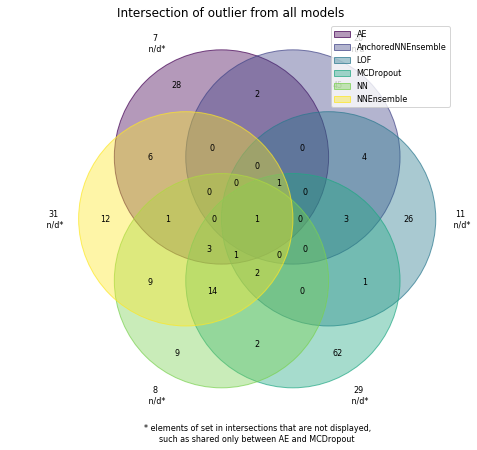

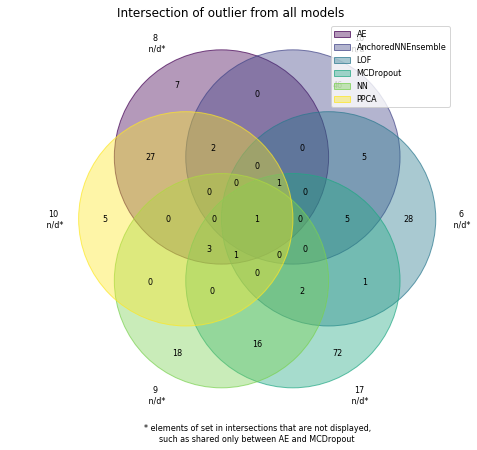

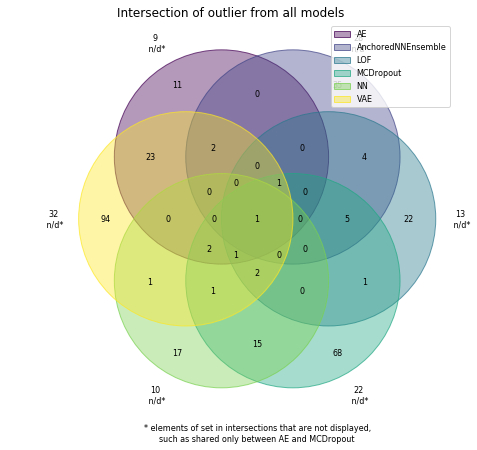

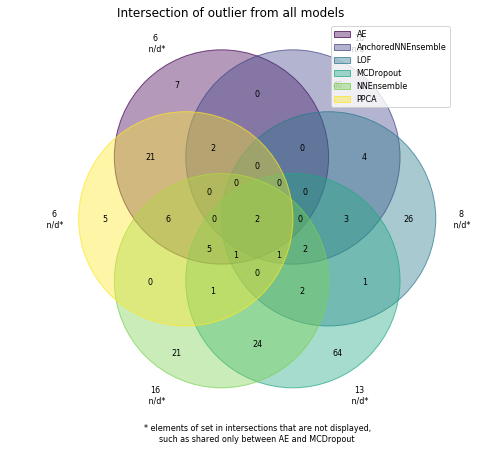

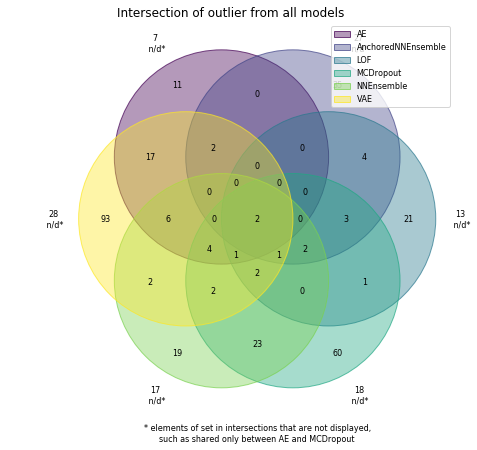

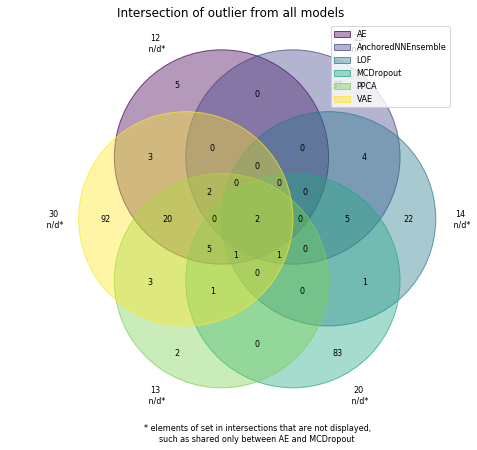

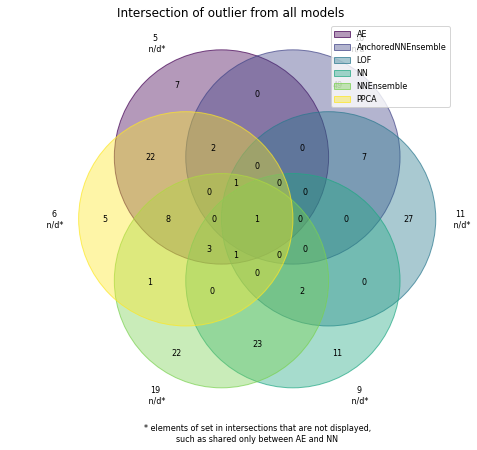

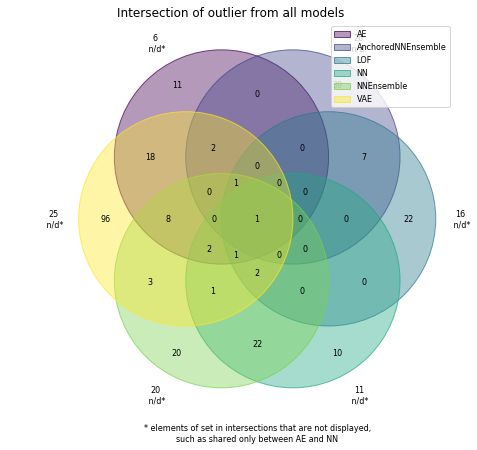

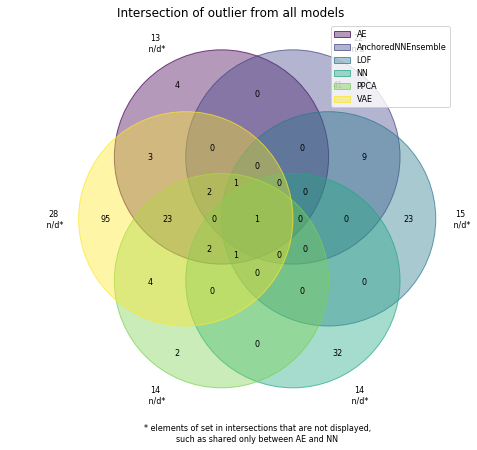

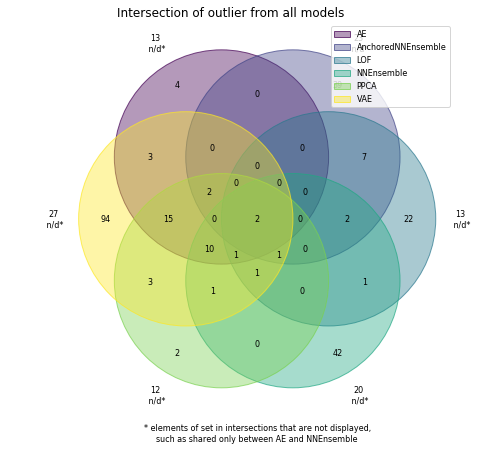

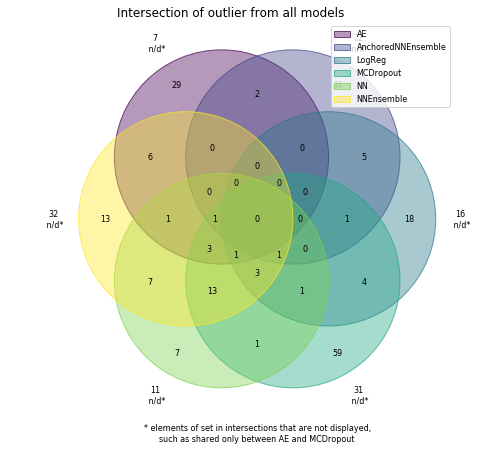

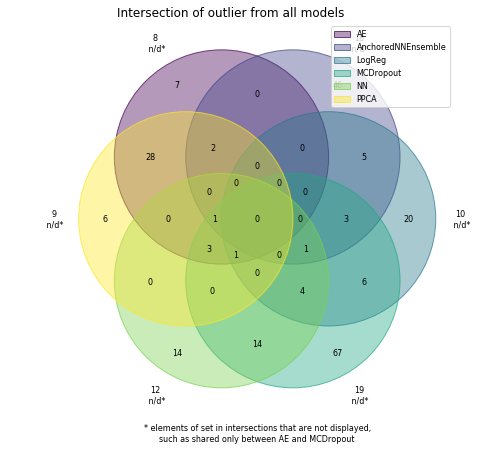

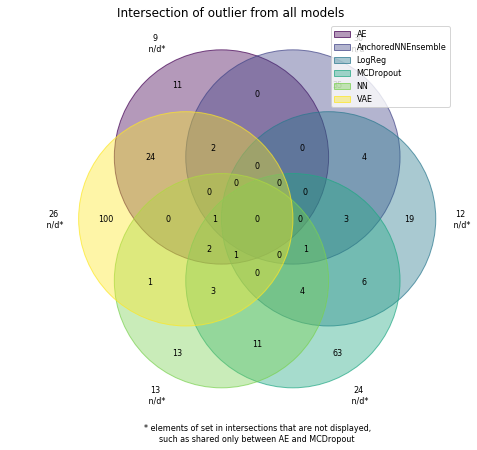

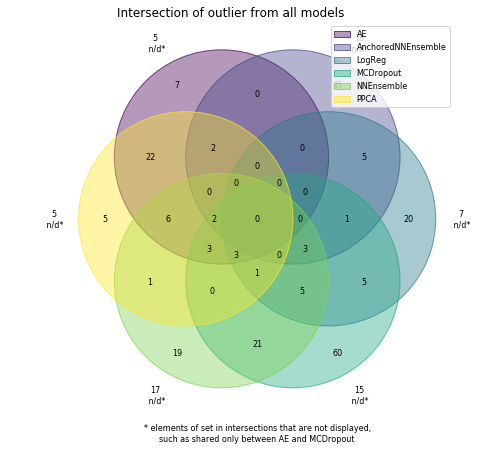

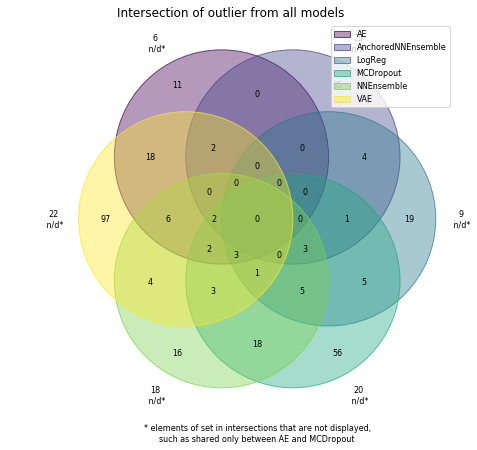

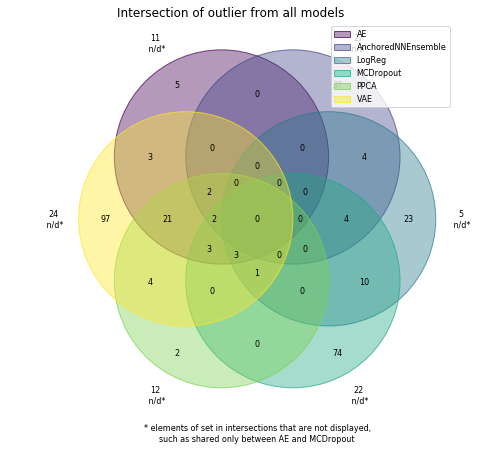

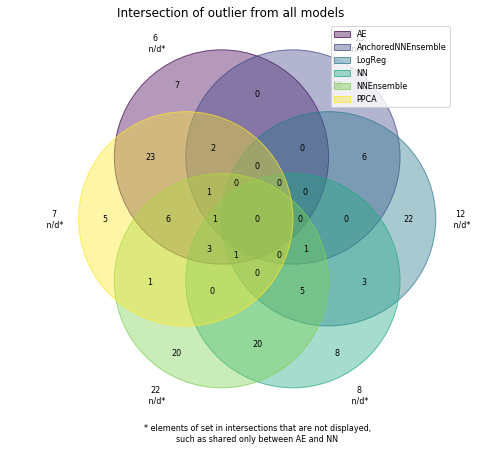

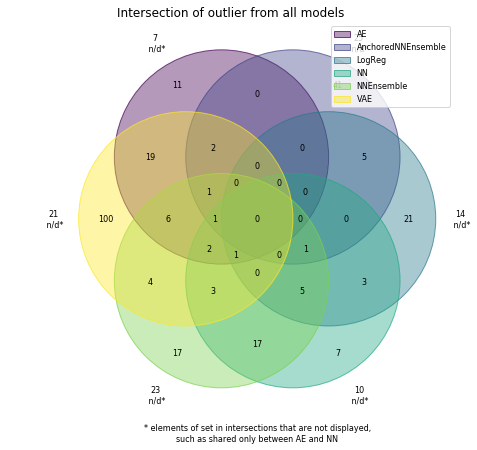

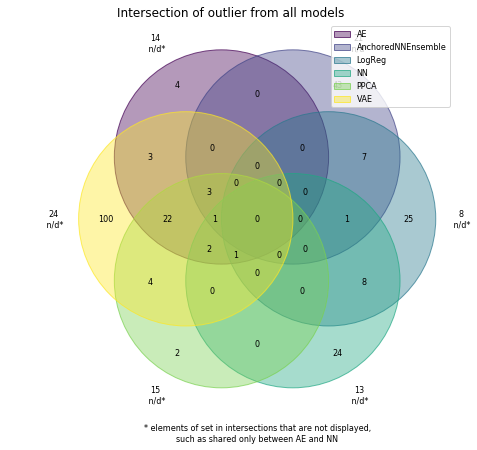

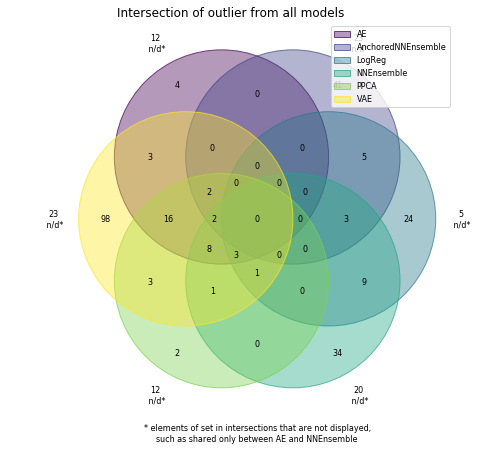

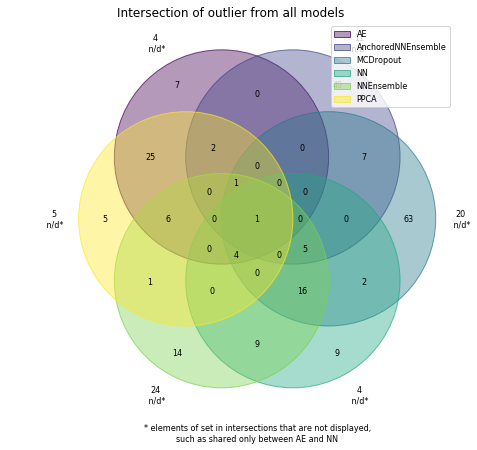

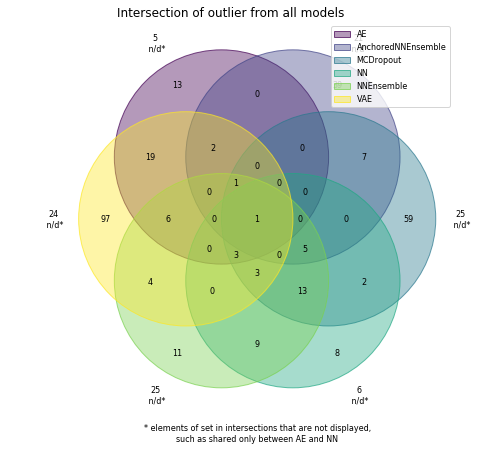

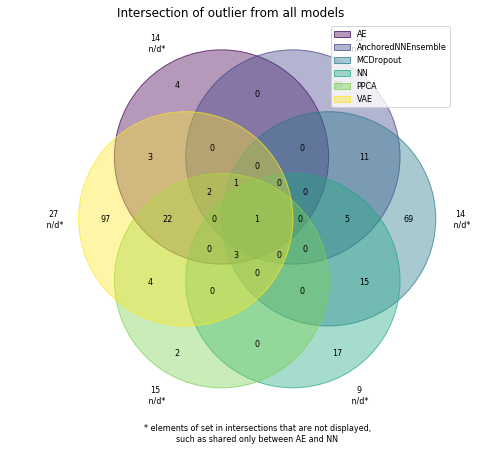

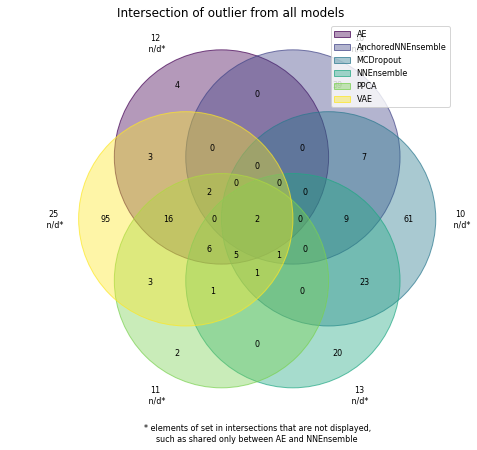

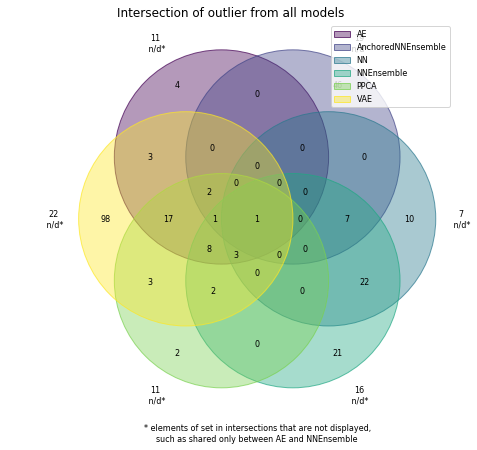

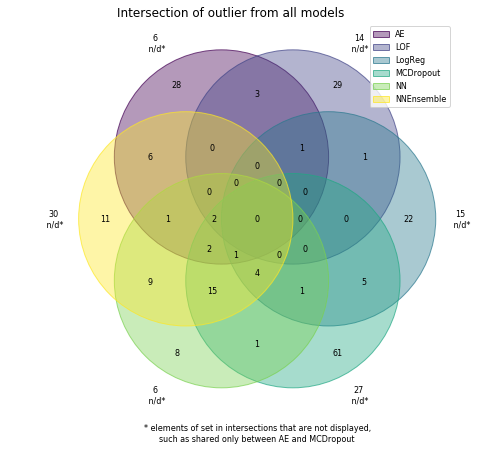

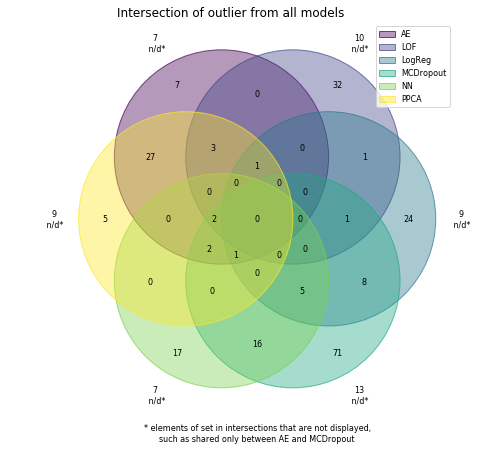

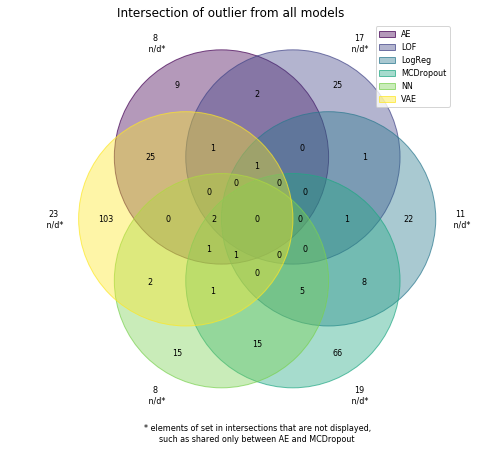

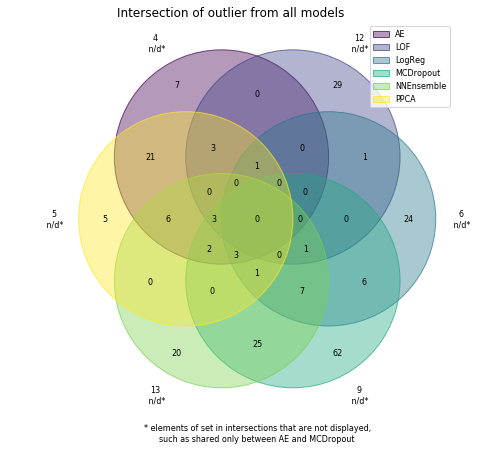

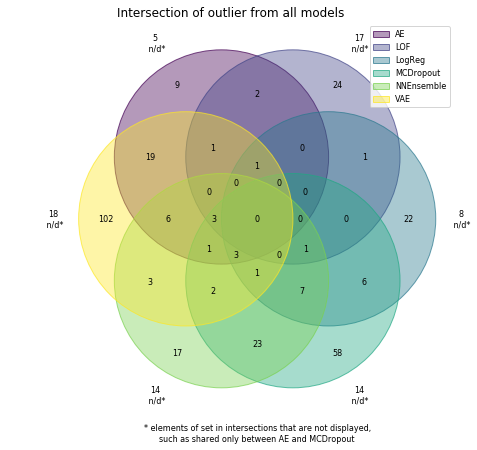

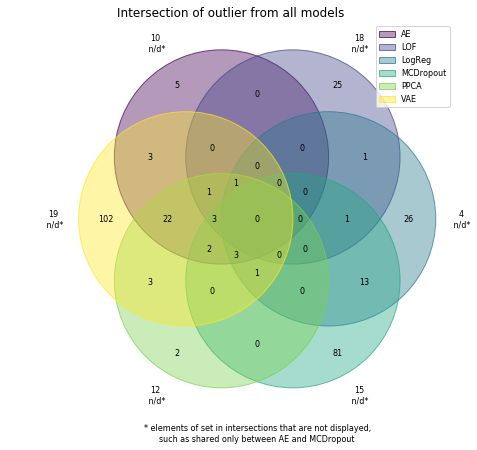

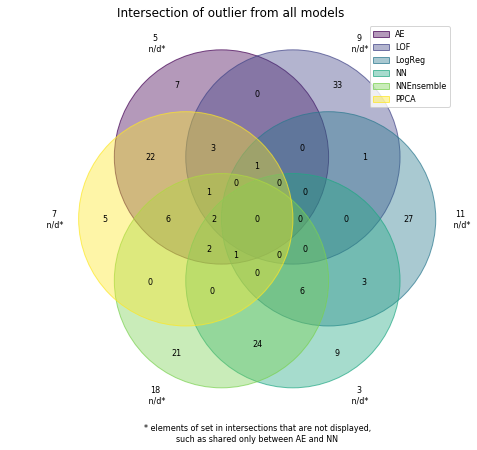

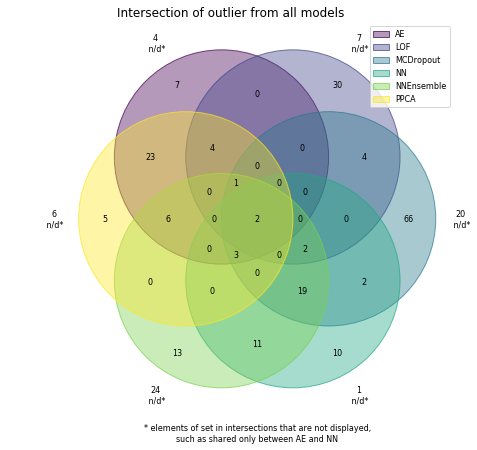

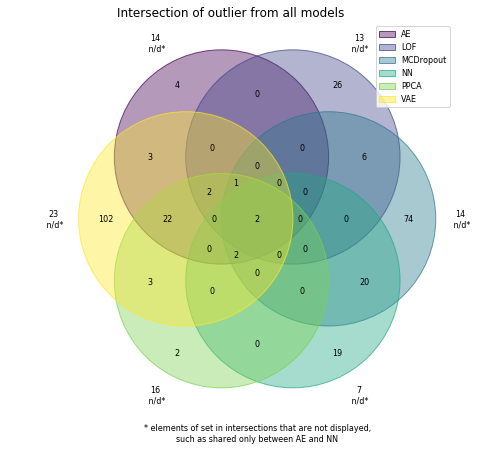

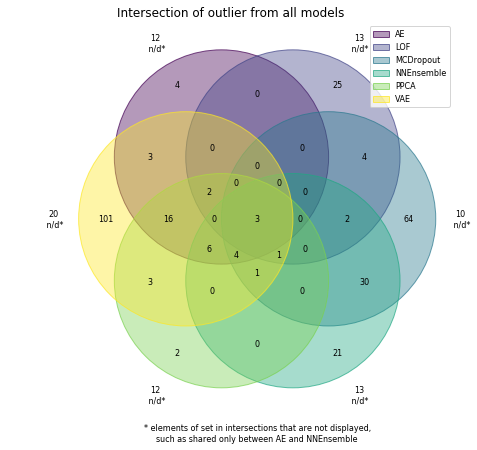

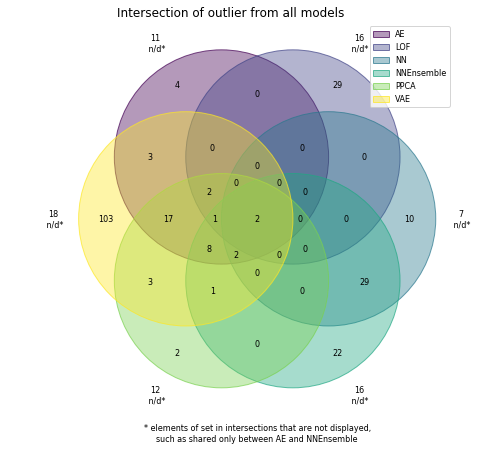

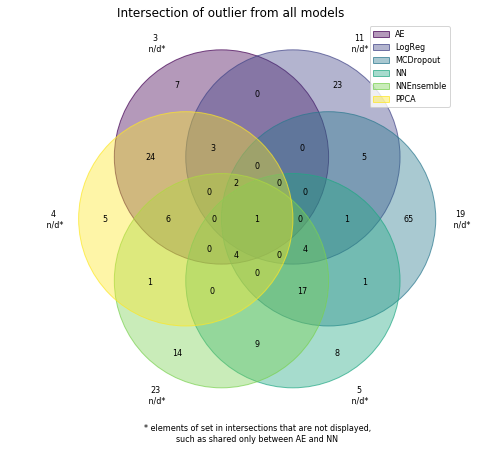

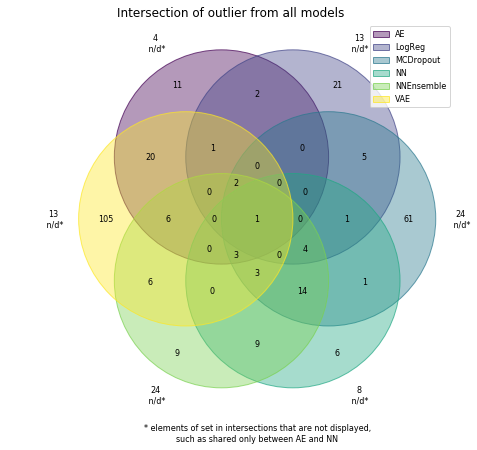

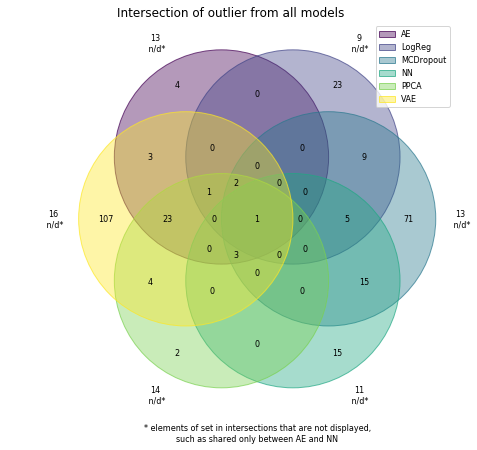

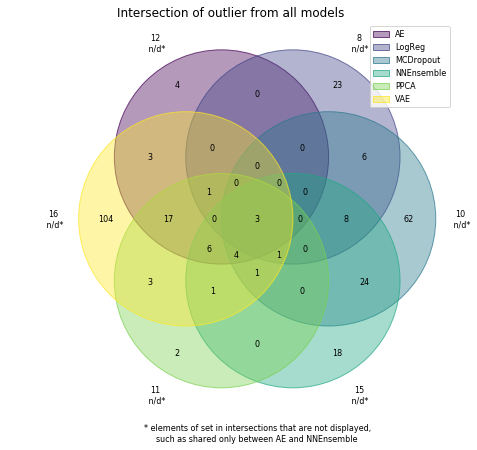

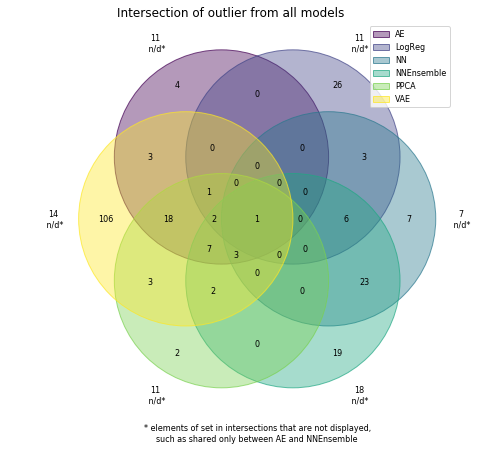

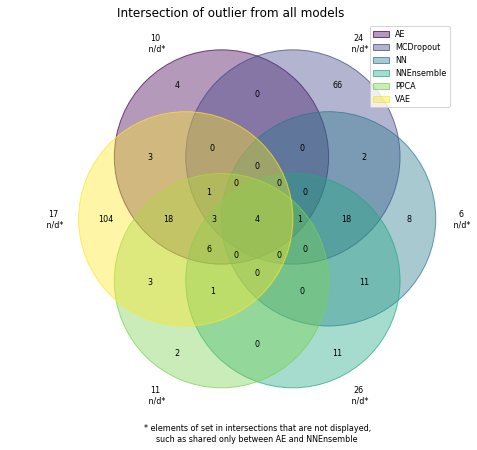

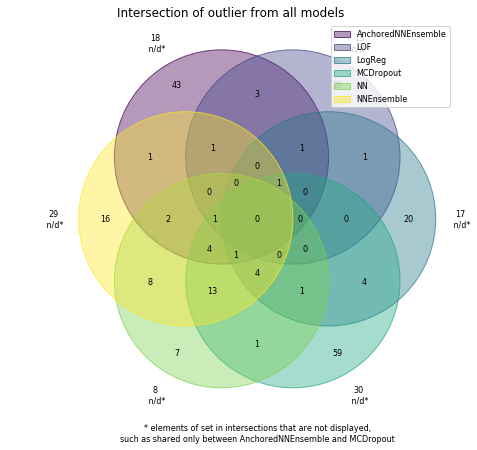

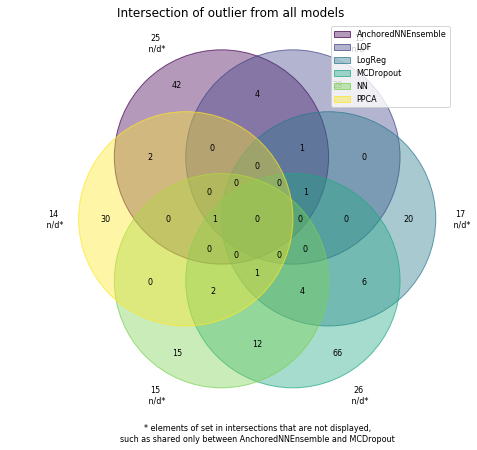

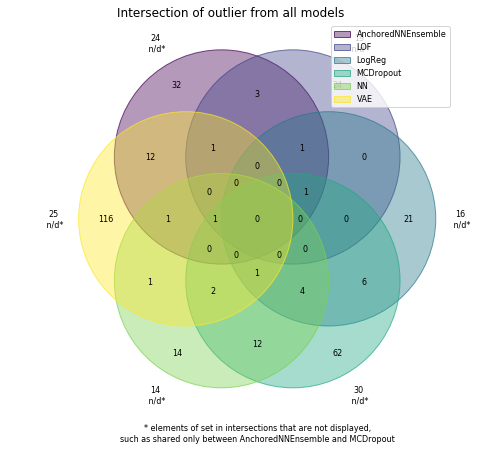

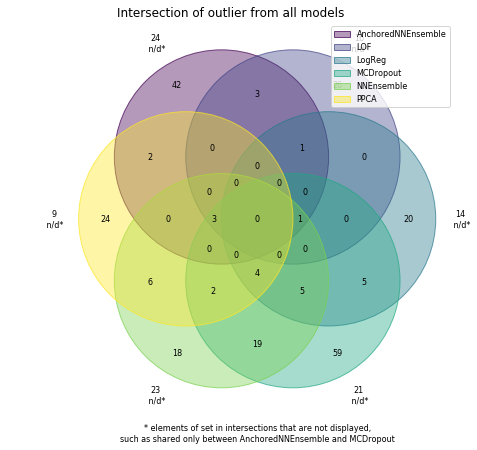

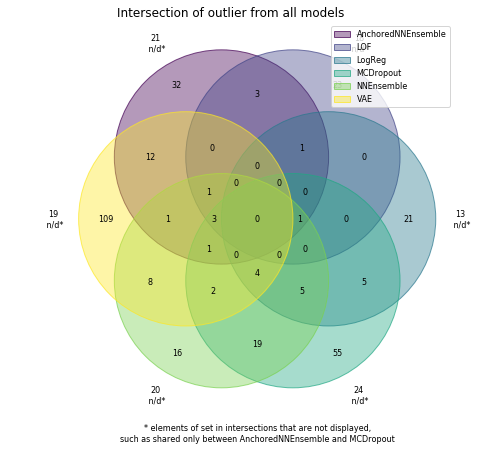

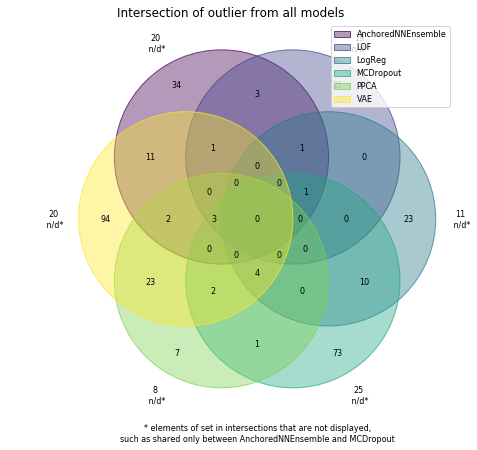

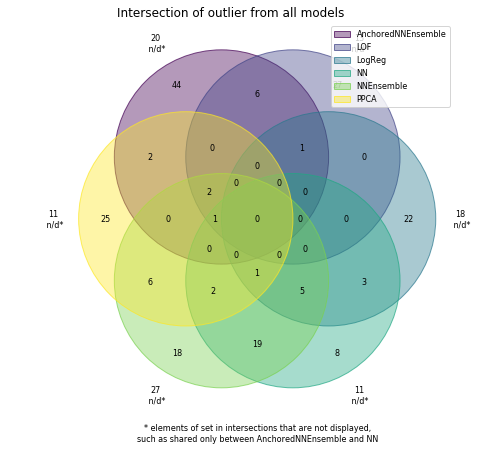

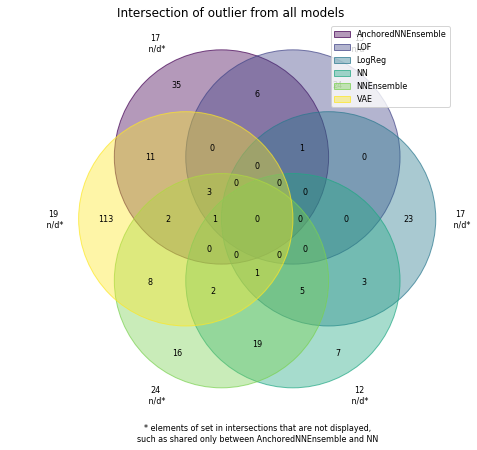

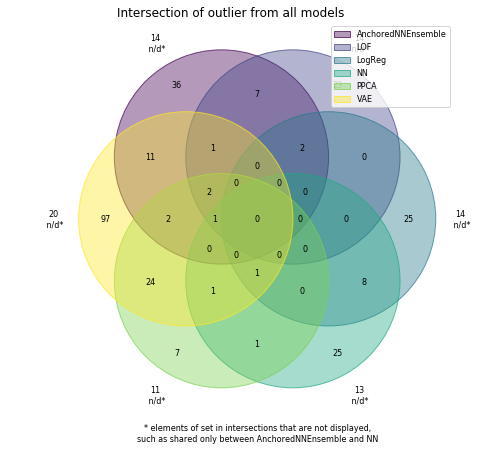

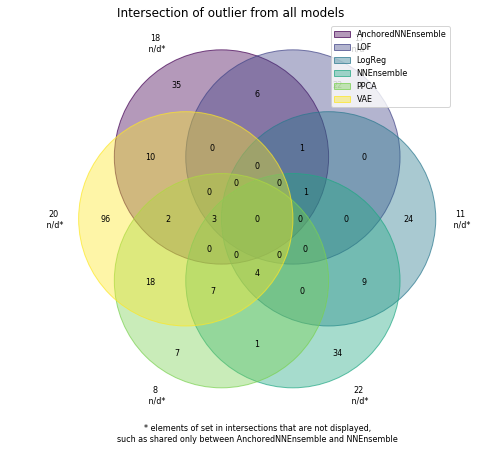

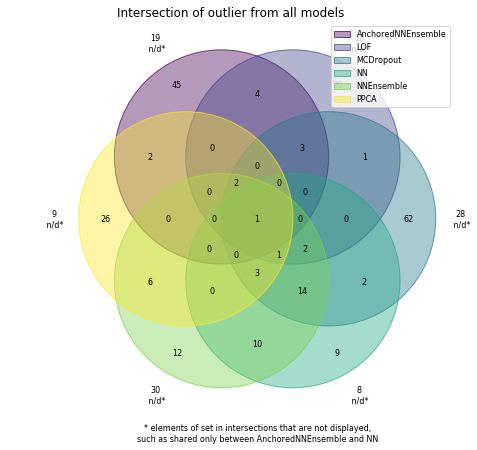

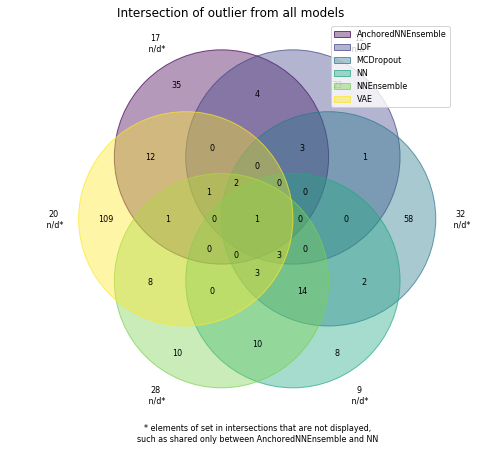

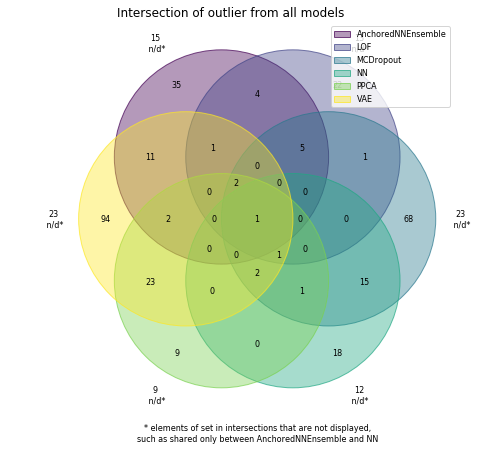

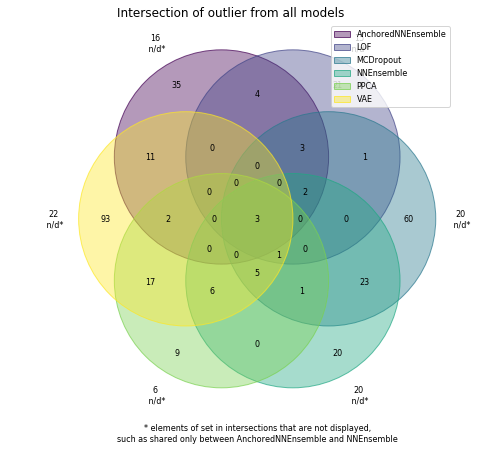

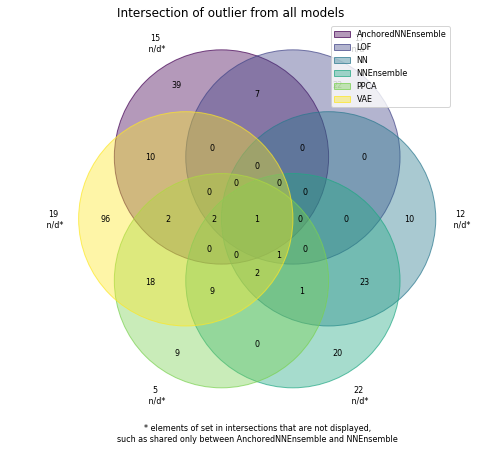

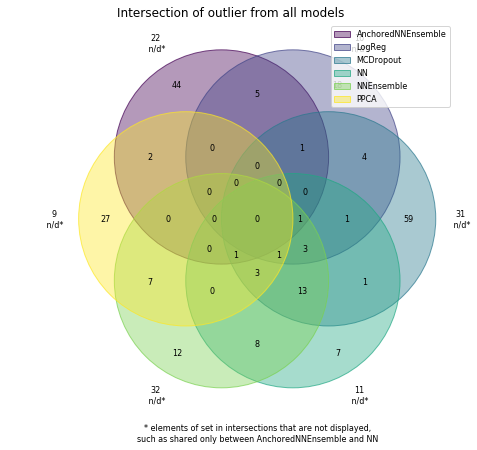

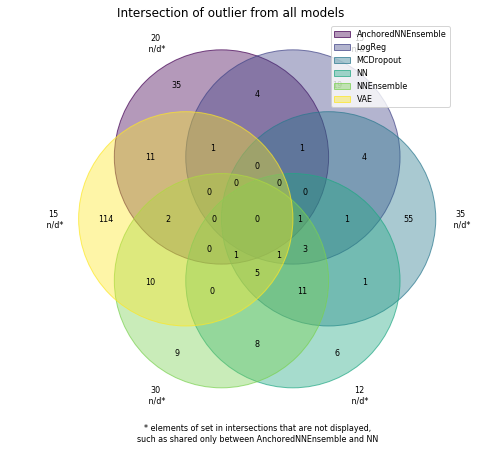

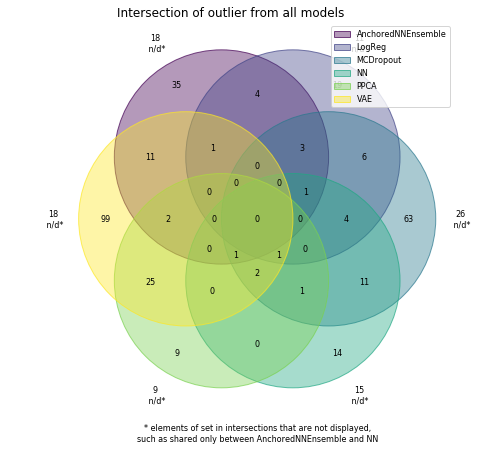

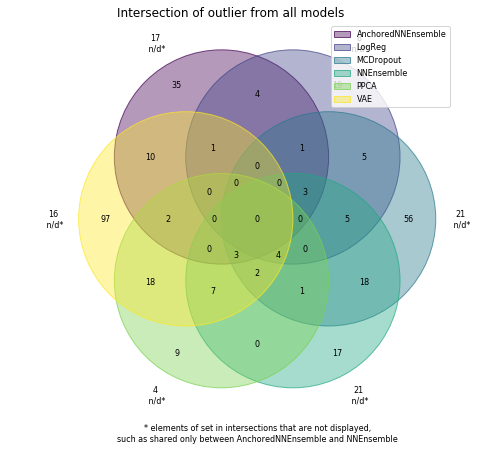

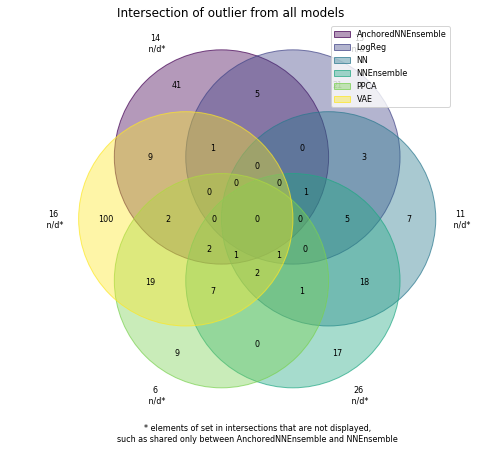

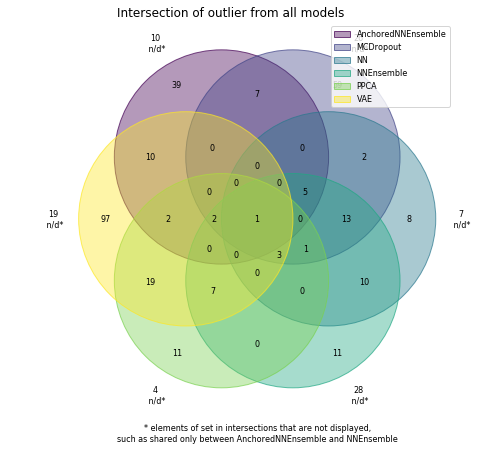

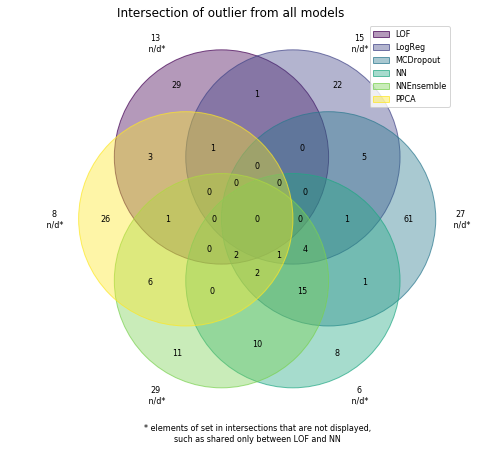

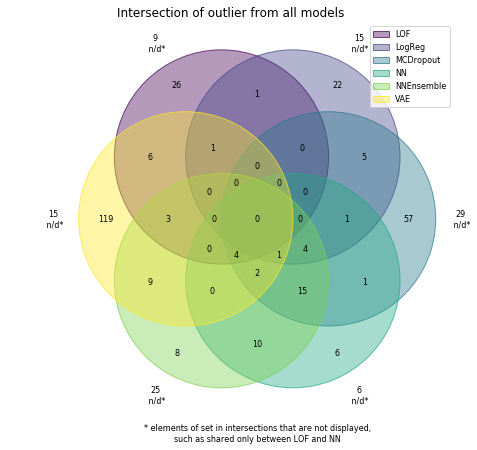

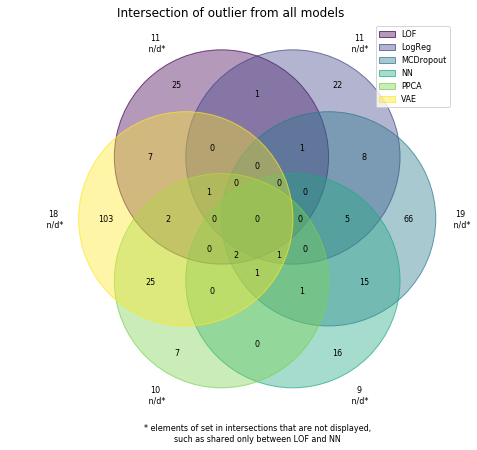

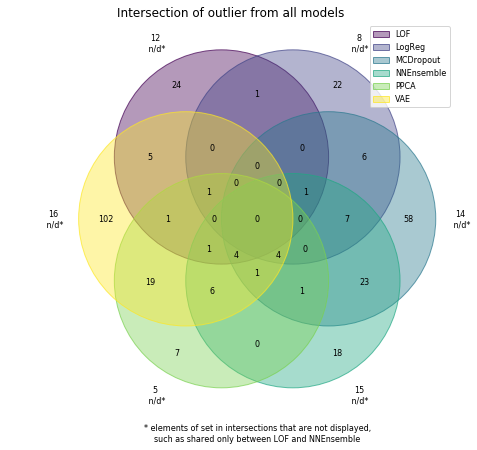

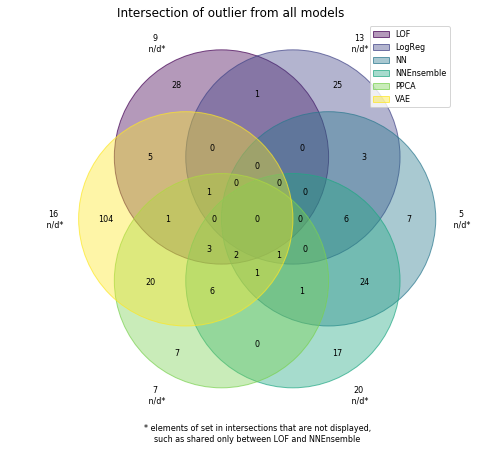

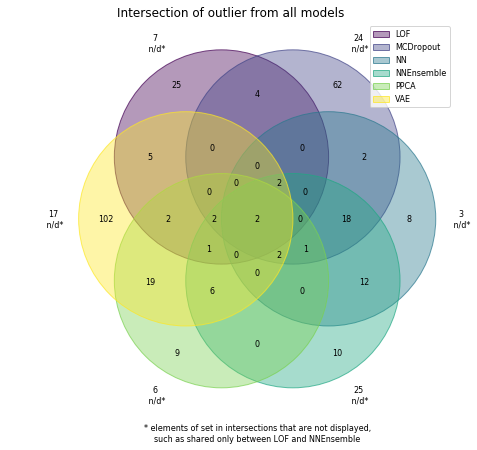

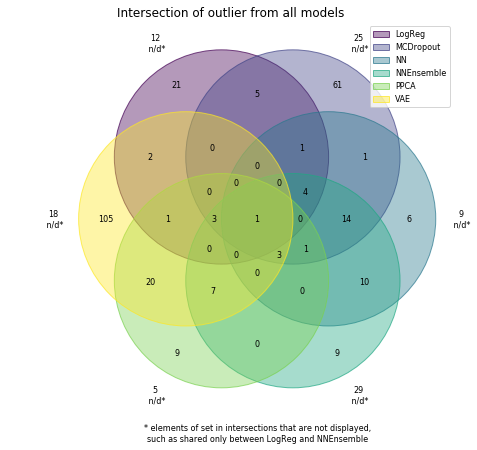

In [22]:
# Plot pseudovenn for all the possible combinations of size 6 
for col_list in res:
    plot_venn(IDs, col_list, pseudo=True)

In [23]:
# Pick the best column (that gets the most intersected IDs)

col_list = ["AE", "MCDropout", "NN", "NNEnsemble", "PPCA", "VAE"]
intrs = get_id_sets(IDs, col_list)

# Create a setlist from each model's patient's IDs to find the patients in the center of the Venn diagram
setlist = [set(v) for k,v in intrs.items()]
u = set.intersection(*setlist)
print(f"Patient IDs at the intersection: {u}.")

Patient IDs at the intersection: {393, 933, 318, 247}.


### Separate models

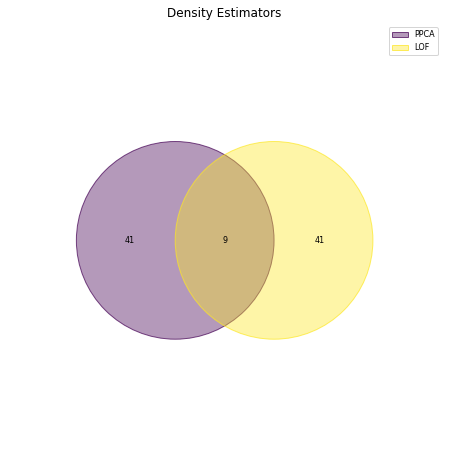

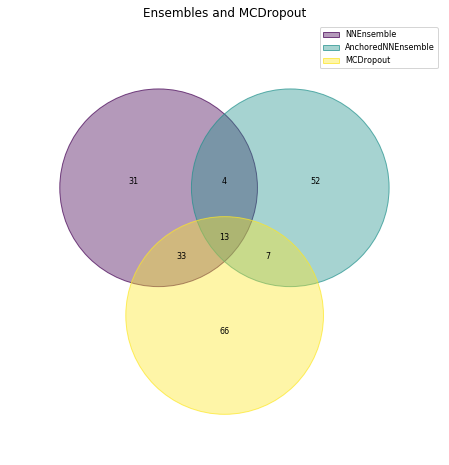

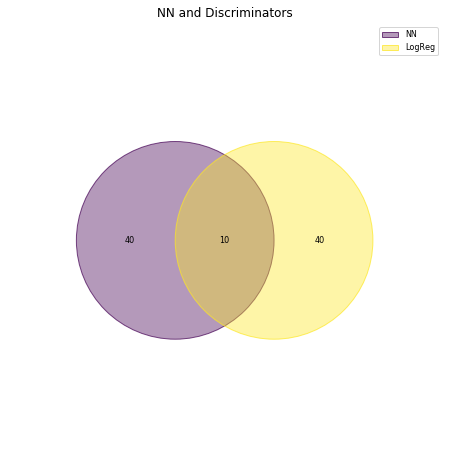

In [30]:
ens = ["NNEnsemble", "AnchoredNNEnsemble", "MCDropout"]
nn = ["NN", "LogReg"]
density = ["PPCA", "LOF"]

model_types = {"Density Estimators": density, 
               "Ensembles and MCDropout": ens,
               "NN and Discriminators": nn}

for name, types in model_types.items():
    plot_venn(IDs, types, pseudo = False, title = name)

### Separate metrics

In [99]:
IDs_sel = IDs.iloc[:,IDs.columns.get_level_values(1)=='(max prob)']
IDs_sel

NN     LogReg
             (max prob) (max prob)
Top Outliers                      
0                     2         56
1                    18         63
2                   146         71
3                   172         97
4                   223        134
5                   247        146
6                   250        161
7                   252        252
8                   255        297
9                   290        315
10                  318        346
11                  357        354
12                  364        365
13                  375        366
14                  385        390
15                  393        393
16                  406        414
17                  407        430
18                  414        461
19                  452        462
20                  463        487
21                  502        489
22                  511        511
23                  604        515
24                  626        526
25                  635        558
26                  636        589
27                  654        604
28                  672        646
29                  700        746
30                  710        749
31                  868        757
32                  923        764
33                  933        840
34                  942        866
35                  944        869
36                  989        880
37                 1001        890
38                 1025        987
39                 1060        991
40                 1066       1001
41                 1131       1025
42                 1133       1027
43                 1178       1036
44                 1206       1066
45                 1225       1069
46                 1236       1094
47                 1267       1112
48                 1271       1133
49                 1315       1143

Text(0.5, 1.0, 'Max probability')

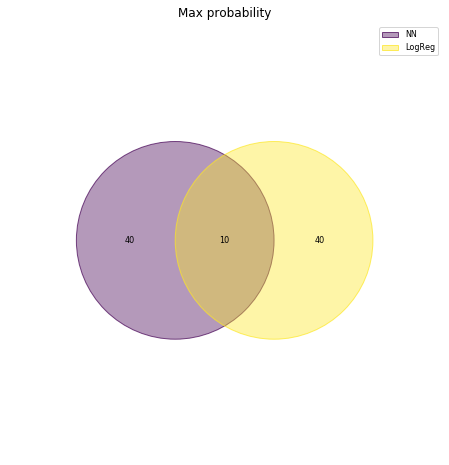

In [100]:
sets = get_id_sets(IDs_entropy, ["NN", "LogReg"])
venn(sets, fontsize = 8)
plt.title("Max probability")